### Import the libraries

In [1]:
import numpy as np
import pandas as pd

### Get the data

In [41]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [48]:
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [49]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [12]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [13]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Merge them together:

In [14]:
df = pd.merge(df, movie_titles, on='item_id')

In [15]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## EDA

### Import vizualisation libraries

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
sns.set_style('white')

In [19]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [20]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

##### create a ratings dataframe with average rating and number of ratings:

In [21]:
ratings =pd.DataFrame(df.groupby('title')['rating'].mean())

In [22]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


#####  Set the number of ratings column:

In [23]:
ratings['rating_numbers'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [24]:
ratings.head()

,rating,rating_numbers
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


##### Number of ratings histogram

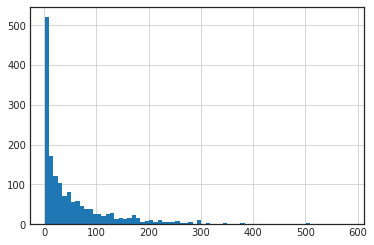

In [25]:
ratings['rating_numbers'].hist(bins=70)

#### Average rating per movie histogram

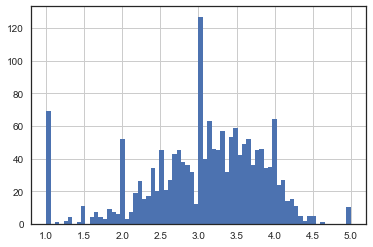

In [63]:
ratings['rating'].hist(bins=70)

##### Relationship between the average rating and the actual number of ratings
###### The larger the number of ratings, the more likely the rating of a movie is

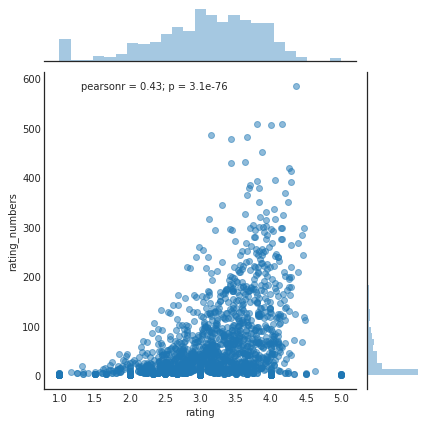

In [26]:
sns.jointplot(x='rating', y='rating_numbers', data=ratings, alpha=0.5)

## Recommending Similar Movies

Let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. The NaN values are due to most people not having seen most of the movies.

In [27]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Most rated movies

In [28]:
ratings.sort_values('rating_numbers', ascending=False).head(10)

,rating,rating_numbers
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


#### Let's choose two movies for our system: Starwars, a sci-fi movie. And Liar Liar, a comedy.

What are the user ratings for those two movies?

In [29]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liar_liar_user_ratings =moviemat['Liar Liar (1997)']

In [30]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

#### correlation of every other movie to that specific user behaviour on the StarWars movie

In [31]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_starwars.head()

/home/karuna/anaconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/karuna/anaconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

#### correlation of every other movie to that specific user behaviour on the Liar Liar movie

In [32]:
similar_to_liarliar = moviemat.corrwith(liar_liar_user_ratings)
similar_to_liarliar.head()

/home/karuna/anaconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/karuna/anaconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

##### remove the NaN values and use a DF instead of Series

In [33]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [72]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


### Perfectly correlated movies with StarWars? 
##### most likely these movies happen to have been seen only by one person who also happend to rate StarWars 5 stars

In [34]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


#### Set a threshold for the number of ratings necessary and filter out movies that have less than a certain number of reviews

join the 'number of ratings' column to our dataframe

In [35]:
corr_starwars = corr_starwars.join(ratings['rating_numbers'], how='left', lsuffix='_left', rsuffix='_right')
corr_starwars.head()

,Correlation,rating_numbers
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


filter out movies that have less than 100 reviews (this value was chosen based off the ratings histogram from earlier)

In [36]:
corr_starwars[corr_starwars['rating_numbers']>100].sort_values('Correlation', ascending=False).head()

,Correlation,rating_numbers
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


### Perfectly correlated movies with Liar Liar?

In [37]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])
corr_liarliar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145


##### remove the NaN values and use a DF instead of Series

In [38]:
corr_liarliar.dropna(inplace=True)

In [39]:
corr_liarliar = corr_liarliar.join(ratings['rating_numbers'], how='left')
corr_liarliar.head()

,Correlation,rating_numbers
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


filter out movies that have less than 100 reviews (this value was chosen randomly)

In [40]:
corr_liarliar[corr_liarliar['rating_numbers']>100].sort_values('Correlation', ascending=False).head()

,Correlation,rating_numbers
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
